## All The Techniques Of Handling Missing values

1. Mean/Median/Mode Replacement

2. Random Sample Imputation

3. Capturing NAN values with a New Feature

4. End Of Distribution Imputation

5. Arbitary Imputation

6. Frequent Categories imputation

### Mean/Median/Mode Imputation

When Should we apply?

Mean/median imputation has the assumption that the data are missing completely at random (MCAR). Solve this by replacing the NAN with the most frequent occurance of the variables

In [1]:
import pandas as pd 
titanic = pd.read_csv('/home/rosh/titanic.csv',usecols=['Age','Fare','Survived'])
titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
# Lets see the percentage of nan values
titanic.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [3]:
def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)

Note

So basically what i have done is first i created a function named as imput_nan after that inside the function i have taken three variable i.e df, variable median. so the df represent that which dataset we want to do and after that variable from which column we want to do the imputation i.e which column we want to do the modification and after that the median is telling that by which function you want to fill the nan values i.e mean/median/mode. after this we have created a new table and in that table we are filling the values with function which we want to give

In [4]:
# Computing median value
median = titanic.Age.median()
median

28.0

In [5]:
impute_nan(titanic,'Age',median)

In [6]:
titanic.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [7]:
print(titanic['Age'].std())
print(titanic['Age_median'].std())

14.526497332334044
13.019696550973194


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

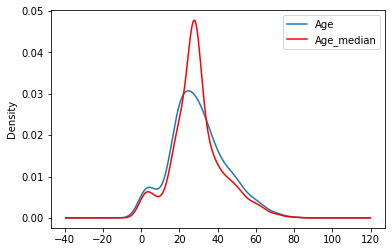

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
titanic['Age'].plot(kind = 'kde', ax = ax) 
titanic['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

## Advantages and Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implemet(Robust to outliers).

2. Faster way to obtain the complete dataset.

#### Disadvantages
1. Change or 2distoation in the original variance

### 2. Random Sample Imputation
Random sample imputation cosist of taking random observation from the dataset and we this observation to replace the nan values

When should it be used?

It assumes that data are missing completely at random (MCAR)

In [10]:
titanic = pd.read_csv('/home/rosh/titanic.csv',usecols=['Age','Fare','Survived'])
titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
# Getting the sum of null values

titanic.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
# Getting the percentage of null values

titanic.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [13]:
# So basically what we are doing is we are getting the sum of null values

titanic['Age'].isnull().sum()

177

In [14]:
titanic['Age'].dropna().sample(titanic['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

Note 

so basically what we are doing in the above statement is that first we are droping the null values and after that we are just replacing the null values with the random values from the age column itself. The reason why we have use dropna is that because we dont want to pick up the sample of NAN values we just want to pickup the sample of the real values that are present so that by picking the real sample we can fill the nan values

In [15]:
# Here we are getting all the indexes

titanic[titanic['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [16]:
def impute_nan(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    ## It will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## Pandas need to have same index in order to merge the data set
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_Random'] = random_sample

Note

The first line is going to create a new feature as Age_medain and their all the nan values will get replaced by the median from the df of variable. The second line will create an another feature that will just store all the values from the age column. after thiswe will get all the index value and inside that index valuw we are just putting some picked up sample data. Then since we have to match both the indexesso that i can merge random sample back to this particular faeture. So for that we are doing dot index and here we are saying that whicheverof age are having null we  are going to ppick up the indexes.So once we pick up all the indexes we will have all the index and than i am putting the condition that whereever it is null by using loc and the feature we are just saying replace it with the random sample 

In [17]:
median = titanic.Age.median()
median

28.0

In [18]:
impute_nan(titanic,'Age',median)

In [20]:
titanic.head(10)

,Survived,Age,Fare,Age_median,Age_random,Age_Random
0,0,22.0,7.2500,22.0,22.0,NaN
1,1,38.0,71.2833,38.0,38.0,NaN
2,1,26.0,7.9250,26.0,26.0,NaN
3,1,35.0,53.1000,35.0,35.0,NaN
4,0,35.0,8.0500,35.0,35.0,NaN
5,0,NaN,8.4583,28.0,NaN,28.0
6,0,54.0,51.8625,54.0,54.0,NaN
7,0,2.0,21.0750,2.0,2.0,NaN
8,1,27.0,11.1333,27.0,27.0,NaN
9,1,14.0,30.0708,14.0,14.0,NaN


### Advantages

1. Easy to implement

2. There is less distortion in variance

### Disadvantage

1. Every situation randomness wontwork

## 3. Capturing NAN values with a new feature or variable

It works well when you have data that are not missing completely at random

In [23]:
titanic = pd.read_csv('/home/rosh/titanic.csv', usecols=['Age','Survived', 'Fare'])
titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
# Replacing all the nan values with the one by using numpy

import numpy as np
titanic['Age_nan'] = np.where(titanic['Age'].isnull(),1,0)

In [26]:
titanic.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [27]:
titanic.Age.median()

28.0

In [29]:
# Filling the nan values with the madian

titanic['Age'].fillna(titanic.Age.median(),inplace=True)

In [30]:
# So as now as we can see that where ever there were null values i,e 1 is present has been got replaced

titanic.head(20)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantage

1. Easy to implement

2. Capture the importance of missing value

### Disadvantage
1. Creating additional feature(Curse of dimensionality)